<a href="https://colab.research.google.com/github/invegat/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_143_Introduction_to_Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 143

## Introduction to Bayesian Inference

!['Detector! What would the Bayesian statistician say if I asked him whether the--' [roll] 'I AM A NEUTRINO DETECTOR, NOT A LABYRINTH GUARD. SERIOUSLY, DID YOUR BRAIN FALL OUT?' [roll] '... yes.'](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png)

*[XKCD 1132](https://www.xkcd.com/1132/)*


## Prepare - Bayes' Theorem and the Bayesian mindset

Bayes' theorem possesses a near-mythical quality - a bit of math that somehow magically evaluates a situation. But this mythicalness has more to do with its reputation and advanced applications than the actual core of it - deriving it is actually remarkably straightforward.

### The Law of Total Probability

By definition, the total probability of all outcomes (events) if some variable (event space) $A$ is 1. That is:

$$P(A) = \sum_n P(A_n) = 1$$

The law of total probability takes this further, considering two variables ($A$ and $B$) and relating their marginal probabilities (their likelihoods considered independently, without reference to one another) and their conditional probabilities (their likelihoods considered jointly). A marginal probability is simply notated as e.g. $P(A)$, while a conditional probability is notated $P(A|B)$, which reads "probability of $A$ *given* $B$".

The law of total probability states:

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

In words - the total probability of $A$ is equal to the sum of the conditional probability of $A$ on any given event $B_n$ times the probability of that event $B_n$, and summed over all possible events in $B$.

### The Law of Conditional Probability

What's the probability of something conditioned on something else? To determine this we have to go back to set theory and think about the intersection of sets:

The formula for actual calculation:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

We can see how this relates back to the law of total probability - multiply both sides by $P(B)$ and you get $P(A|B)P(B) = P(A \cap B)$ - replaced back into the law of total probability we get $P(A) = \sum_n P(A \cap B_n)$.

This may not seem like an improvement at first, but try to relate it back to the above picture - if you think of sets as physical objects, we're saying that the total probability of $A$ given $B$ is all the little pieces of it intersected with $B$, added together. The conditional probability is then just that again, but divided by the probability of $B$ itself happening in the first place.

### Bayes Theorem

Here is is, the seemingly magic tool:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In words - the probability of $A$ conditioned on $B$ is the probability of $B$ conditioned on $A$, times the probability of $A$ and divided by the probability of $B$. These unconditioned probabilities are referred to as "prior beliefs", and the conditioned probabilities as "updated."

Why is this important? Scroll back up to the XKCD example - the Bayesian statistician draws a less absurd conclusion because their prior belief in the likelihood that the sun will go nova is extremely low. So, even when updated based on evidence from a detector that is $35/36 = 0.972$ accurate, the prior belief doesn't shift enough to change their overall opinion.

There's many examples of Bayes' theorem - one less absurd example is to apply to [breathalyzer tests](https://www.bayestheorem.net/breathalyzer-example/). You may think that a breathalyzer test that is 100% accurate for true positives (detecting somebody who is drunk) is pretty good, but what if it also has 8% false positives (indicating somebody is drunk when they're not)? And furthermore, the rate of drunk driving (and thus our prior belief)  is 1/1000.

What is the likelihood somebody really is drunk if they test positive? Some may guess it's 92% - the difference between the true positives and the false positives. But we have a prior belief of the background/true rate of drunk driving. Sounds like a job for Bayes' theorem!

$$
\begin{aligned}
P(Drunk | Positive) &= \frac{P(Positive | Drunk)P(Drunk)}{P(Positive)} \\
&= \frac{1 \times 0.001}{0.08} \\
&= 0.0125
\end{aligned}
$$

In other words, the likelihood that somebody is drunk given they tested positive with a breathalyzer in this situation is only 1.25% - probably much lower than you'd guess. This is why, in practice, it's important to have a repeated test to confirm (the probability of two false positives in a row is $0.08 * 0.08 = 0.0064$, much lower), and Bayes' theorem has been relevant in court cases where proper consideration of evidence was important.

## Live Lecture - Deriving Bayes' Theorem, Calculating Bayesian Confidence

Notice that $P(A|B)$ appears in the above laws - in Bayesian terms, this is the belief in $A$ updated for the evidence $B$. So all we need to do is solve for this term to derive Bayes' theorem. Let's do it together!

Notice that  P(A|B)  appears in the above laws - in Bayesian terms, this is the belief in  A  updated for the evidence  B . So all we need to do is solve for this term to derive Bayes' theorem. Let's do it together!

x=2  is an inline equation.

x=2 
is a block equation.

x=2=1+1 
Now let's derive Bayes!

$$\Huge{P(A∩B)P(A|B)⇒P(A|B)P(B)P(B|A)⇒P(B|A)P(A)⇒P(A|B)P(B)⇒P(A|B)=P(B∩A)=P(A∩B)P(B)=P(A∩B)=P(B∩A)P(A)=P(B∩A)=P(A∩B)=P(B|A)P(A)=P(B|A)P(A)P(B)}
$$

In [0]:
# Activity 2 - Use SciPy to calculate Bayesian confidence intervals
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.htm
#scipy.stats.bayes_mvs

from scipy import stats
import numpy as np

coinflips = np.random.binomial(n=1, p=0.5, size=100)
print(coinflips)

[1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0
 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1
 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0]


In [0]:
# Frequentist approach (from yesterday)
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  return (mean, mean - interval, mean + interval)

confidence_interval(coinflips)

(0.5, 0.400289346502771, 0.599710653497229)

In [0]:
stats.bayes_mvs(coinflips)

(Mean(statistic=0.5, minmax=(0.4165622050050835, 0.5834377949949164)),
 Variance(statistic=0.25773195876288657, minmax=(0.20288054430043756, 0.3244800809493055)),
 Std_dev(statistic=0.5063663545823536, minmax=(0.45042262853950576, 0.5696315308594719)))

## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [1]:
# http://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29#
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip

--2019-01-01 02:11:49--  http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42989872 (41M) [application/zip]
Saving to: ‘drugsCom_raw.zip’

drugsCom_raw.zip    100%[===================>]  41.00M  18.3MB/s    in 2.2s    

2019-01-01 02:11:51 (18.3 MB/s) - ‘drugsCom_raw.zip’ saved [42989872/42989872]



In [2]:
!unzip drugsCom_raw.zip

Archive:  drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


In [9]:
import pandas as pd
from datetime import datetime
sample_size = 10000
r = 123
df = pd.read_csv('drugsComTrain_raw.tsv', sep='\t')
#df = df[df.drugName.notnull() and df.condition.notnull() and df.rating.notnull()]
df = df.dropna()
df = df[~df.condition.str.contains('<')]
df = df.sample(n=sample_size, random_state=r).drop(['Unnamed: 0','review'], axis=1)
df.date = df.date.apply(lambda d: datetime.strptime(d,'%B %d, %Y'))
df.tail()

,drugName,condition,rating,date,usefulCount
135870,Etonogestrel,Birth Control,3.0,2012-05-15,0
13001,Bisacodyl,Constipation,8.0,2016-07-13,3
91406,Budeprion SR,Depression,9.0,2010-11-18,30
120803,Sronyx,Birth Control,2.0,2016-04-30,7
127020,Atenolol,Ventricular Tachycardia,4.0,2011-07-29,19


In [0]:
# Confidence intervals!
# Similar to hypothesis testing, but centered at sample mean
# Better than reporting the "point estimate" (sample mean)
# Why? Because point estimates aren't always perfect

import numpy as np
from scipy import stats

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence ifor nterval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  mean, variance, std  = stats.bayes_mvs(np.array(data), alpha=0.95)

  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  return (mean, mean - interval, mean + interval)

def report_confidence_interval(confidence_interval):
  """
  Return a string with a pretty report of a confidence interval.
  
  Arguments:
    confidence_interval - tuple of (mean, lower bound, upper bound)
  
  Returns:
    None, but prints to screen the report
  """
  #print('Mean: {}'.format(confidence_interval[0]))
  #print('Lower bound: {}'.format(confidence_interval[1]))
  #print('Upper bound: {}'.format(confidence_interval[2]))
  s = "our mean lies in the interval ]{:.2}, {:.2}[".format(
      confidence_interval[1], confidence_interval[2])
  s = f"our mean {confidence_interval[0]:.2f} lies in the interval {confidence_interval[1]:.2f} - {confidence_interval[2]:.2f}"
  return s

In [31]:
!pip install -U matplotlib

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.0.2)


In [11]:
import matplotlib
matplotlib.__version__

'3.0.2'

In [0]:

import matplotlib.pyplot as plt
plt.rcParams['figure.constrained_layout.use'] = False
half_mean_height = 0.1

def printChart(c,data):

  df = pd.DataFrame.from_dict(data)
  # print(df.head())
  n = len(data)
  plt.figure(figsize=(max(n/5,5),5))
  data_order = [
        'min_stars','below_ci', 'ci_half_l', 'mean', 'ci_half_h', 'max_stars'
   ]
  colors = [None, "b",'g', 'black', "g", "gold"]
#   values = np.array([[d[name] for name in data_order] for d in data])
  order = np.array(data_order)
  ind = np.arange(n)    # the x locations for the groups
  bottom = np.array(df['min_stars'])
  width = 0.4
  name_dict = {'below_ci': 'Low Stars','ci_half_l': 'Confidence Interval','mean': 'Confidence Interval Mean',  'ci_half_h': None, 'max_stars': 'High Stars'}
  for name,color in zip(data_order[1:],colors[1:]):
    value = np.array(df[name])
    # p1 = plt.bar(ind, value, width, color=color, bottom = bottom, label=name_dict[name], alpha=(1 if name == 'mean_low' else 0.5))
    p1 = plt.bar(ind, value, width, color=color, bottom = bottom, label=name_dict[name]) 
    bottom += value
    # print(f'name: {name} color: {color} value: {value}')
  #plt.bar(ind,np.array(df.mean_high),width, color='black', bottom=np.array(df.mean_low), label = 'Mean')

#   plt.yticks(bottoms+0.4, ["data %d" % (t+1) for t in bottoms])
  plt.legend(loc="best", bbox_to_anchor=(1.0, 1.00))
  plt.ylabel('Stars')
  plt.title(f"Drugs for {c}")
  plt.xticks(ind, np.array(df['drug']), rotation=('vertical' if n > 3 else 'horizontal'))
#   start, end = plt.yaxis
#   plt.yaxis.set_major_locator(ticker.MultipleLocator((end - start) / 10))
  axes = plt.gca()
  axes.set_ylim([0,10.5])
  plt.yticks(np.arange(0, 11, 1))
#   plt.subplots_adjust(right=0.85)

  plt.show();
  

for condition Birth Control drug Ethinyl estradiol / norelgestromin 95% confidence interval our mean 7.70 lies in the interval 6.56 - 8.85
for condition Birth Control drug Skyla 95% confidence interval our mean 7.16 lies in the interval 6.23 - 8.09
for condition Birth Control drug NuvaRing 95% confidence interval our mean 6.83 lies in the interval 5.91 - 7.75
for condition Birth Control drug Mirena 95% confidence interval our mean 6.79 lies in the interval 5.94 - 7.64
for condition Birth Control drug Levonorgestrel 95% confidence interval our mean 6.76 lies in the interval 6.29 - 7.24
for condition Birth Control drug Copper 95% confidence interval our mean 6.65 lies in the interval 5.60 - 7.70
for condition Birth Control drug Ethinyl estradiol / etonogestrel 95% confidence interval our mean 6.48 lies in the interval 5.79 - 7.17
for condition Birth Control drug Implanon 95% confidence interval our mean 6.43 lies in the interval 5.58 - 7.28
for condition Birth Control drug Lo Loestrin Fe

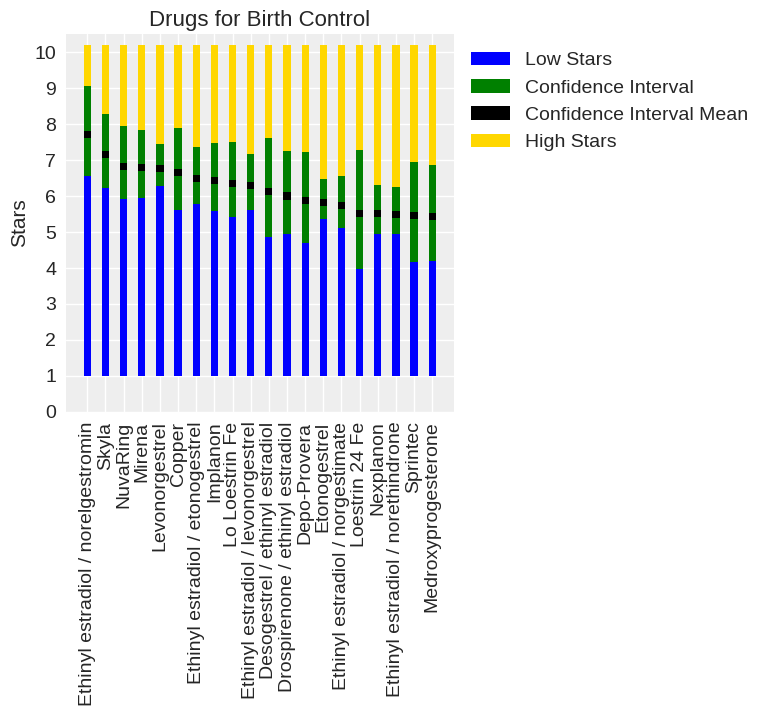

In [29]:

c_unique = df.condition.unique()
minLen = 20
for c in c_unique:
  # print(c)
  d_unique =  df[df.condition == c].drugName.unique()
  cis = []
  for d in d_unique:
    cdf = df[(df.condition == c) & (df.drugName == d) ]['rating'] 
    ci = None
    lcdf = len(cdf)
    if lcdf >= minLen:
      ci = confidence_interval(cdf)
      
      min_stars = cdf.min()
      below_ci = max(ci[1] - min_stars,0)
      ci_l = (ci[2] - ci[1])
      ci_half_l = ci[0] - ci[1] - half_mean_height
      ci_half_h = ci_l - ci_half_l
      mean = 2 * half_mean_height
      max_stars = max(cdf.max() - ci[2], 0)          
      cis.append({'ci': ci,  'drug': d, 'reviews_count': lcdf, 'min_stars': min_stars, 'below_ci': below_ci,   'ci_half_l': ci_half_l,  'mean': mean, 'ci_half_h': ci_half_h,  'max_stars': max_stars })     
      # cis.append({'ci': ci,  'drug': d, 'reviews_count': lcdf, 'min_stars': cdf.min(), 'max_stars': cdf.max(), 'mean_low': ci[0] - half_mean_height, 'mean_high': ci[0] + half_mean_height, 'low': ci[1], 'high': ci[2]  })
  if len(cis) > 0:
    cis = sorted(cis, key=lambda v: v['ci'][0], reverse=True) # sorting by ci mean
    for _ci in cis:
      print(f"for condition {c} drug {_ci['drug']} 95% confidence interval {report_confidence_interval(_ci['ci'])}")
    printChart(c,cis)
    break # remove break for all conditions

In [23]:
!pip install arviz

In [0]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az
from sklearn import preprocessing
import pickle
import datetime as dt

def plots(pname):
  with open(pname, 'rb') as buff:
    data = pickle.load(buff) 
  dist = stats.norm()
  trace = data['trace']   
  L =  trace['μ'].shape[1]
  az.style.use('arviz-white')
  fig = plt.figure(figsize=(6,0.5))

  c_ax = fig.add_subplot(111)
  # Turn off axis lines and ticks of the condition subplot
  c_ax.spines['top'].set_color('none')
  c_ax.spines['bottom'].set_color('none')
  c_ax.spines['left'].set_color('none')
  c_ax.spines['right'].set_color('none')
  c_ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
  c_ax.text(0.8,0,f'Condition {c}')

  az.style.use('arviz-darkgrid')
  _, ax = plt.subplots(rows, 2, figsize=(12, 8*rows/3),constrained_layout=True)

  comparisons = [(i, j) for i in range(L) for j in range(i+1, L)]
  pos = [(k, l) for k in range(rows) for l in (0, 1)]

  for (i, j), (k, l) in zip(comparisons, pos):
      drug_i = d_unique[i]
      means_diff = trace['μ'][:, i] - trace['μ'][:, j]
      d_cohen = (means_diff / np.sqrt((trace['σ'][:, i]**2 + trace['σ'][:, j]**2) / 2)).mean()
      ps = dist.cdf(d_cohen/(2**0.5))
      az.plot_posterior(means_diff, ref_val=0, ax=ax[k, l])
      ax[k, l].set_title(f'{d_unique[i]}-{d_unique[j]}')
      ax[k, l].plot(
          0, label=f"Cohen's d = {d_cohen:.2f}\nProb sup = {ps:.2f}", alpha=0)
      ax[k, l].legend()  

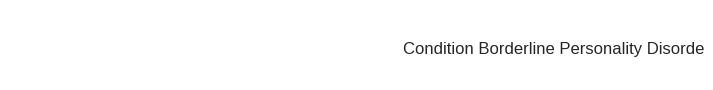

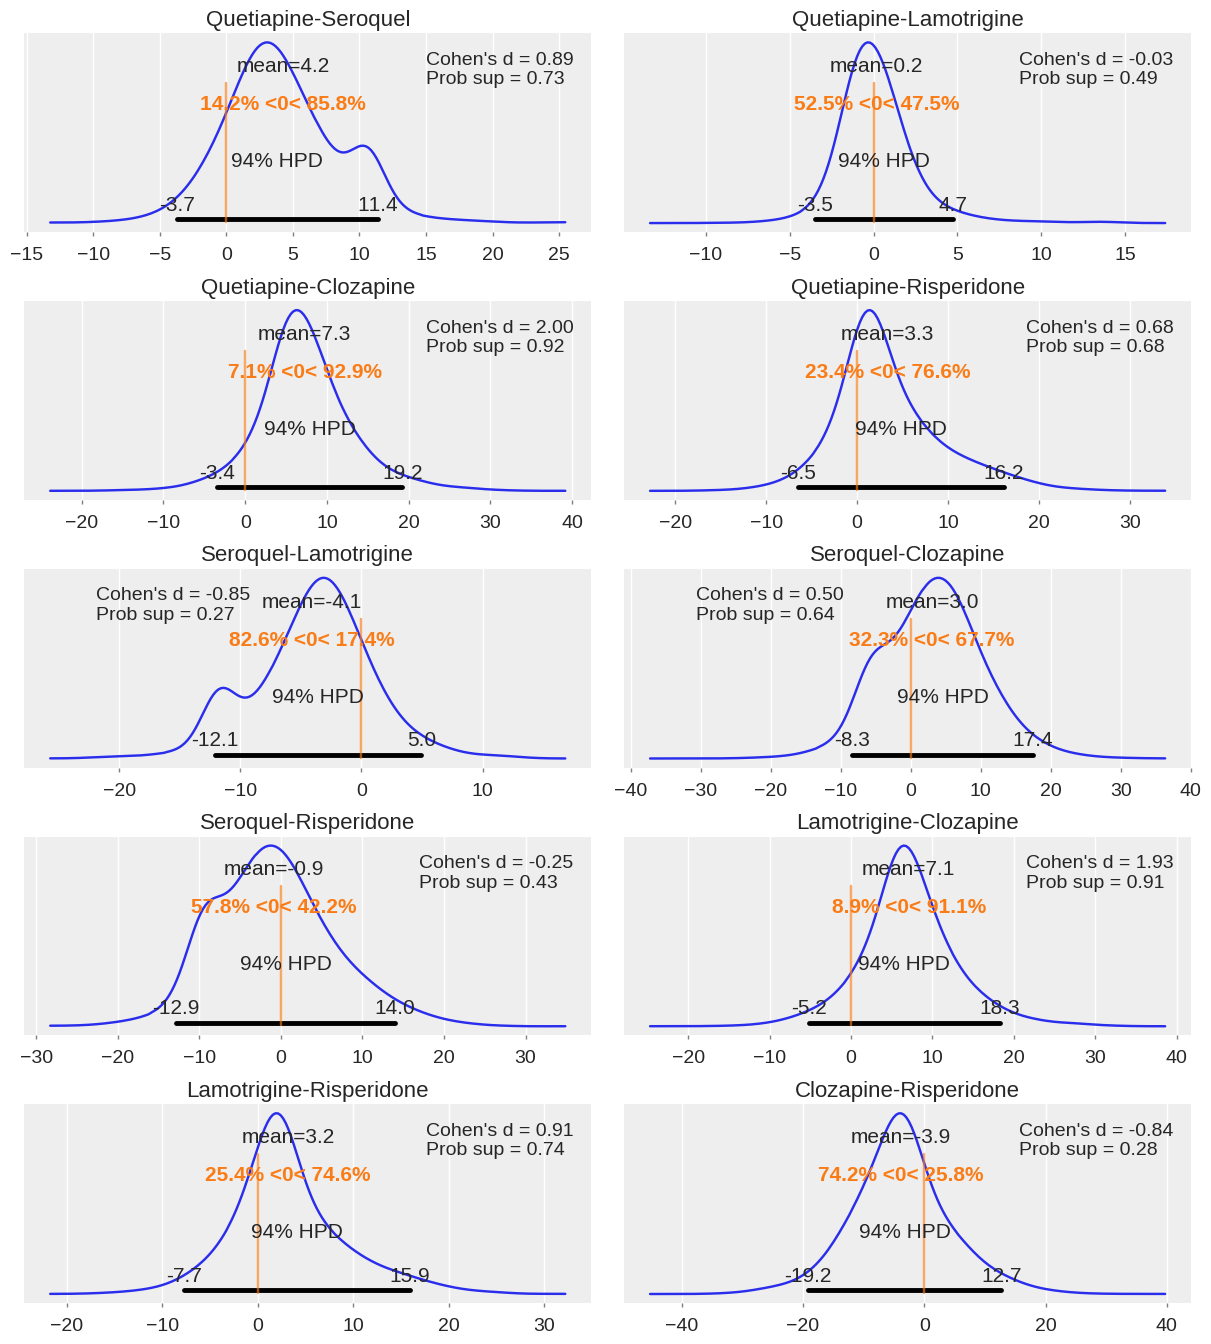

In [95]:
plots('r123.Borderline Personality Disorde.pkl')

5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [σ, μ]
100%|██████████| 5500/5500 [00:08<00:00, 636.40it/s]
There were 581 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1252 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


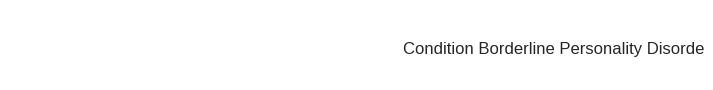

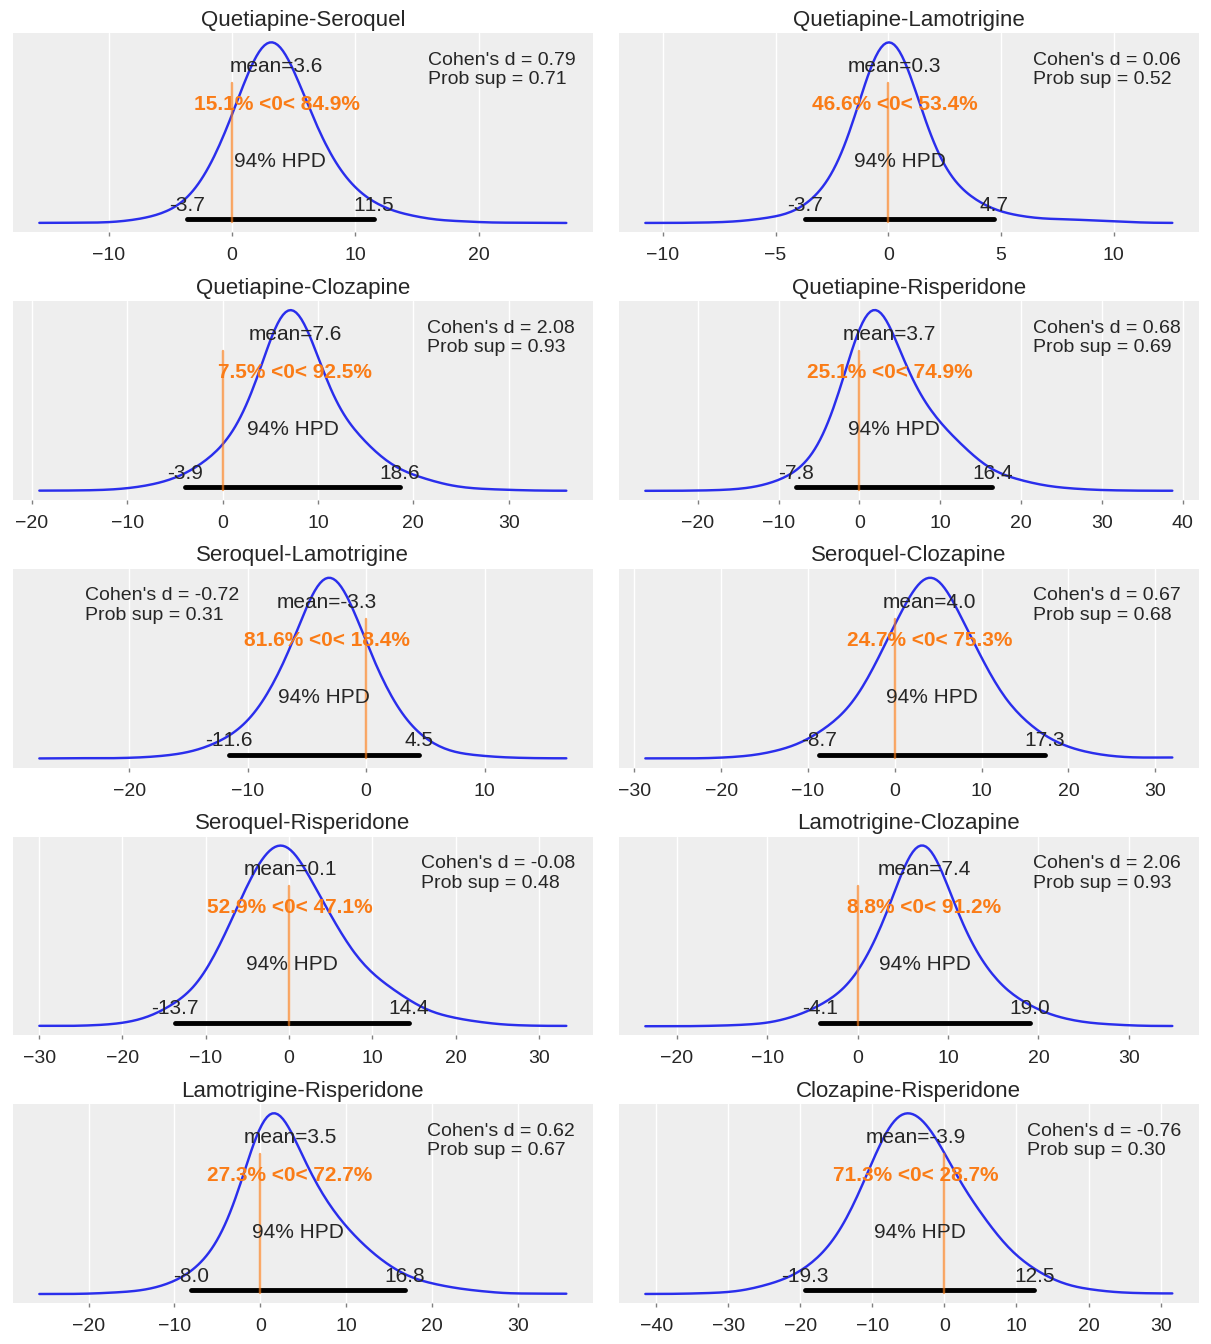

In [96]:


# from arviz.data.io_pymc3 import from_pymc3

az.style.use('arviz-darkgrid')

c_unique = df.condition.unique()
condition_length = len(c_unique)
for c in c_unique:
  # print(c)
  d_unique = df[df.condition == c].drugName.unique()
  star =  df[df.condition == c].rating.values
  idx = pd.Categorical(df[df.condition == c].drugName,
                     categories=d_unique).codes
  groups = len(np.unique(idx))
  print(groups)
  with pm.Model() as comparing_groups:
    μ = pm.Normal('μ', mu=0, sd=10, shape=groups)
    σ = pm.HalfNormal('σ', sd=10, shape=groups)

    y = pm.Normal('y', mu=μ[idx], sd=σ[idx], observed=star)

    trace = pm.sample(5000) 
    pname = f'r{r}.{c}.pkl'
    with open(pname, 'wb') as buff:
      pickle.dump({'model': comparing_groups, 'trace': trace}, buff) 
    plots(pname)    
  break # comment out for all conditions

In [97]:
az.style.available

['seaborn-poster',
 'seaborn-paper',
 'seaborn',
 'seaborn-talk',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'bmh',
 'dark_background',
 'seaborn-dark',
 'seaborn-white',
 'fivethirtyeight',
 'seaborn-ticks',
 'tableau-colorblind10',
 'Solarize_Light2',
 'classic',
 '_classic_test',
 'seaborn-notebook',
 'seaborn-pastel',
 'fast',
 'seaborn-whitegrid',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'grayscale',
 'seaborn-bright',
 'arviz-white',
 'arviz-whitegrid',
 'arviz-colors',
 'arviz-darkgrid']